# MSc Thesis - Hugo Stam

##### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

#### Example 1 - Traditional onshore terminal development

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

#### notes:

- ###### add navigation channel (capex and opex)
self.nav_channel_invest(year, fully_cellular, panamax, ...)
 

- ###### add overseas transport costs (opex)
self.calculate_overseas_transport_costs(year, fully_cellular, panamax, ...)

In [1]:
import numpy as np
import pandas as pd
import statistics as st

import matplotlib.pyplot as plt
import matplotlib as mpl

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 15

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(1_000_000)
    elif year <= 2030:
        demand.append(1_500_000)
    else:
        demand.append(2_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
container_defaults.container_data['fully_cellular_perc'] = 0
container_defaults.container_data['panamax_perc'] = 50
container_defaults.container_data['panamax_max_perc'] = 0
container_defaults.container_data['post_panamax_I_perc'] = 0
container_defaults.container_data['post_panamax_II_perc'] = 0
container_defaults.container_data['new_panamax_perc'] = 30
container_defaults.container_data['VLCS_perc'] = 10
container_defaults.container_data['ULCS_perc'] = 10

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]

# plot scenarios 
if False:
    laden.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                        lifecycle = lifecycle, 
                        elements = demand + vessels, 
                        operational_hours = 7500,
                        debug=True)

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from overall demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, revenues)
    7. calculate PV's and aggregate to NPV

In [6]:
Terminal.simulate()


Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 184
  Fully cellular calls: 0
  Panamax calls: 148
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 24
  VLCS calls: 7
  ULCS calls: 5
  Total cargo volume: 1000000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after ad

  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
     Stack capacity planned (@ start of year): 14080
     Stack capacity online (@ start of year): 14080
     Stack capacity required (@ start of year): 13905.76923076923
     Total laden and reefer ground slots required (@ start of year): 3476.4423076923076
     Empty stack capacity planned (@ start of year): 2400
     Empty stack capacity online (@ start of year): 2400
     Empty stack capacity required (@ start of year): 1923.0769230769229
     Empty ground slots required (@ start of year): 320.5128205128205
     OOG slots planned (@ start o

     Number of stack equipment online (@ start of year): 20
     Gate capacity planned (@ start of year): 240
     Gate capacity online (@ start of year): 240
     Gate service rate planned (@ start of year): 1.3522332506203476
     Gate lane minutes  (@ start of year): 324.5359801488834
  *** add gate to elements
  *** add gate to elements
     Empty handlers online (@ start of year): 25
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements

Below, the various investment decisions are evaluated for the year 2027.

Simulate year: 2027
  Total vessel calls: 275
  Fully cellular calls: 0
  Panamax c

  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
     Empty stack capacity planned (@ start of year): 3360
     Empty stack capacity online (@ start of year): 3360
     Empty stack capacity required (@ start of year): 3846.1538461538457
     Empty ground slots required (@ start of year): 641.025641025641
  *** add empty stack to elements
  *** add empty stack to elements
     OOG slots planned (@ start of year): 800
     OOG slots online (@ start of year): 800
     OOG slots required (@ start of year): 964.9848359525778
  *** add OOG stack to elements
  *** add OOG stack to elements
     Number of st

PV: [-5.14838604e+07 -1.94182607e+08 -2.99616775e+07 -2.63820019e+07
 -2.32300086e+07 -2.04546001e+07 -5.97685447e+07 -2.39259668e+07
 -2.10674086e+07 -1.85503771e+07 -1.63340682e+07 -3.17670232e+07
 -2.76983220e+07 -1.49974229e+07 -1.32056037e+07]
NPV: -573009492.8992233


## 3. Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__) # This is the dictionary containing the module's symbol table. 
        # object.__dict__ A dictionary or other mapping object used to store an object's (writable) attributes.


Laden

{'historic_data': [], 'scenario_data':     year   volume
0   2020  1000000
1   2021  1000000
2   2022  1000000
3   2023  1000000
4   2024  1000000
5   2025  1000000
6   2026  1500000
7   2027  1500000
8   2028  1500000
9   2029  1500000
10  2030  1500000
11  2031  2000000
12  2032  2000000
13  2033  2000000
14  2034  2000000, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 50, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 0, 'new_panamax_perc': 30, 'VLCS_perc': 10, 'ULCS_perc': 10, 'name': 'Laden', 'id': 'e066e100-ad52-11e9-a27d-0050b697a632'}

Fully_Cellular_1

{'type': 'Fully_Cellular', 'call_size': 2500, 'LOA': 215, 'draught': 10.0, 'beam': 20.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'starting_fee': 30, 'variable_fee': 0.045, 'avg_overseas_distance': 3000, 'name': 'Fully_Cellular_1', 'id': 'e068437a-ad52-11e9-9079-0050b697a632'}

Panamax_1

{'type': 'Panamax', 'call_size': 3400, 'LOA': 250, '

{'triggers': [], 'labour': 144230.76923076922, 'maintenance': 10000.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'overseas_transport': [], 'residual': [], 'fuel': [], 'capex': 505000, 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2022, 'name': 'Empty Handler', 'id': 'e09ff155-ad52-11e9-b819-0050b697a632', 'shift': 5.769230769230769, 'df':     year     capex  maintenance         labour         fuel
0   2020       0.0          0.0       0.000000     0.000000
1   2021  505000.0          0.0       0.000000     0.000000
2   2022       0.0      10000.0  144230.769231  2133.870968
3   2023       0.0      10000.0  144230.769231  2133.870968
4   2024       0.0      10000.0  144230.769231  2133.870968
5   2025       0.0      10000.0  144230.769231  2133.87096

14  2034        0.0     116280.0  53688.885942}

RS Stack

{'land_use': 4651.2, 'triggers': [], 'capex': 1312800, 'labour': [], 'maintenance': 116280, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'overseas_transport': [], 'residual': [], 'fuel': [], 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'mobilisation': 10000, 'maintenance_perc': 0.1, 'width': 4, 'height': 4, 'length': 20, 'capacity': 320, 'gross_tgs': 18, 'area_factor': 3.23, 'pavement': 200, 'drainage': 50, 'household': 0.1, 'digout_margin': 1.2, 'reefer_factor': 2.33, 'consumption': 4, 'reefer_rack': 3500, 'reefers_present': 0.5, 'year_purchase': [], 'year_online': 2032, 'name': 'RS Stack', 'id': 'e14215ac-ad52-11e9-87cb-0050b697a632', 'df':     year      capex  maintenance        energy
0   2020        0.0          0.0      0.000000
1   2021        0.0          0.0      0.000000
2   2022        0.0          0.0      0.000000
3   2023        0.0          0.0      0.000000
4   2024      

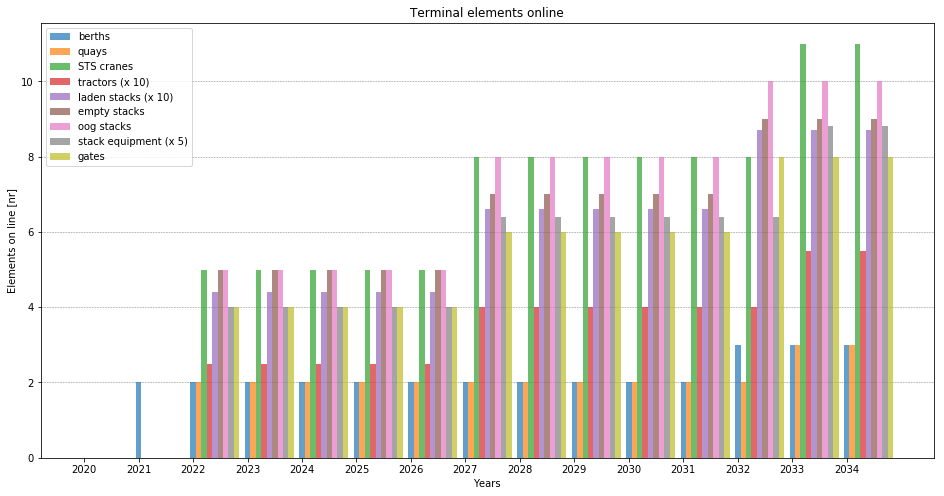

In [8]:
Terminal.terminal_elements_plot()

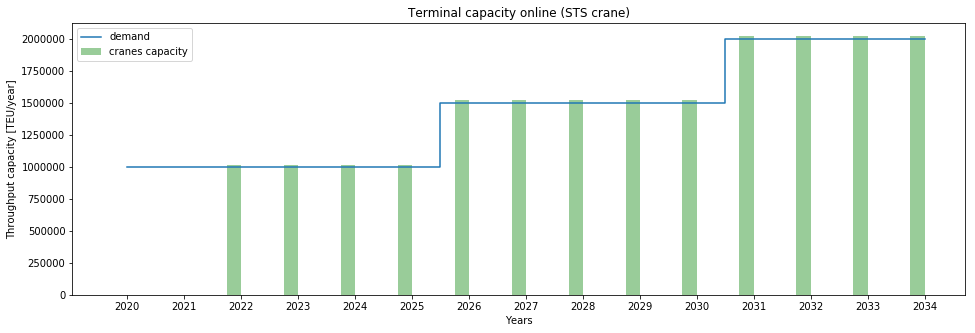

In [9]:
Terminal.terminal_capacity_plot()

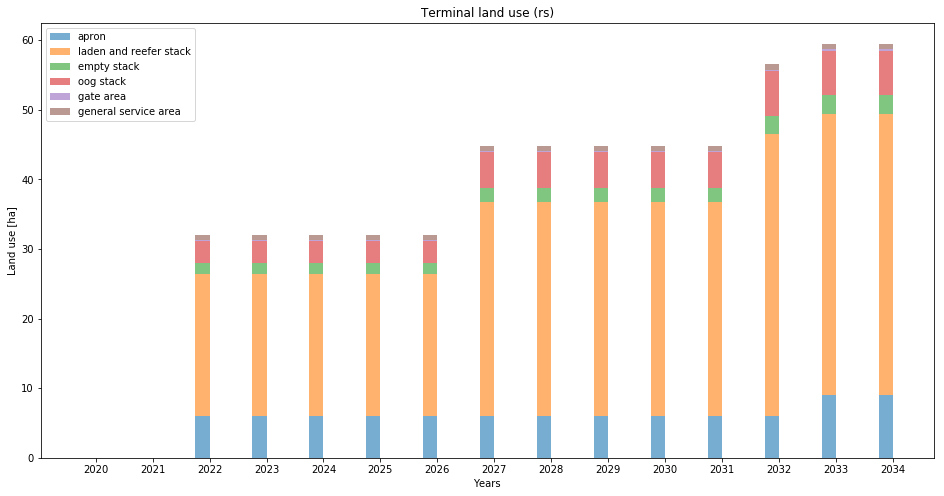

In [10]:
Terminal.land_use_plot()

#### Add cash flow information for each of the terminal elements.

In [11]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

    year        capex   maintenance    insurance        energy        labour  \
0   2020   51483860.4  0.000000e+00        0.000  0.000000e+00           NaN   
1   2021  220530521.6  0.000000e+00        0.000  0.000000e+00           NaN   
2   2022          0.0  1.002152e+07  1233312.470  4.532241e+06  2.013788e+07   
3   2023          0.0  1.002152e+07  1233312.470  4.532241e+06  2.013788e+07   
4   2024          0.0  1.002152e+07  1233312.470  4.532241e+06  2.013788e+07   
5   2025          0.0  1.002152e+07  1233312.470  4.532241e+06  2.013788e+07   
6   2026   85154774.0  1.002152e+07  1233312.470  6.133670e+06  2.161788e+07   
7   2027          0.0  1.470926e+07  1533312.470  6.155426e+06  3.182462e+07   
8   2028          0.0  1.470926e+07  1533312.470  6.155426e+06  3.182462e+07   
9   2029          0.0  1.470926e+07  1533312.470  6.155426e+06  3.182462e+07   
10  2030          0.0  1.470926e+07  1533312.470  6.155426e+06  3.182462e+07   
11  2031   66028904.2  1.470926e+07  153

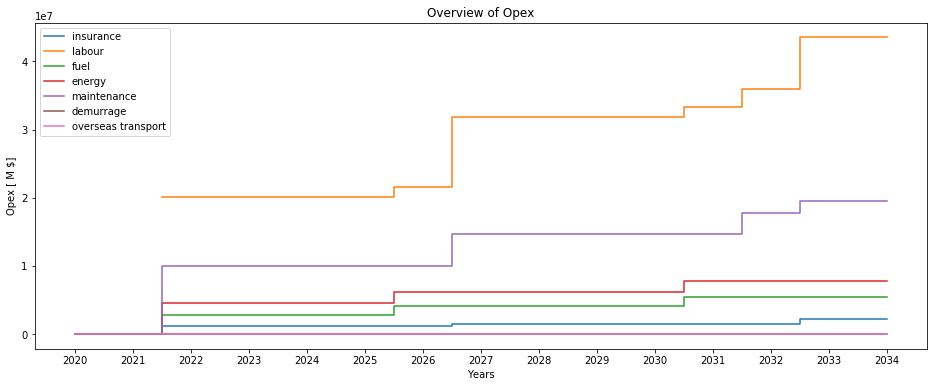

In [12]:
Terminal.opex_plot(cash_flows)

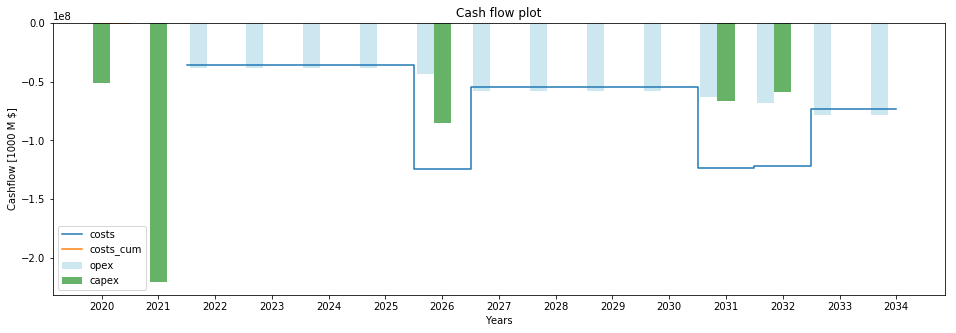

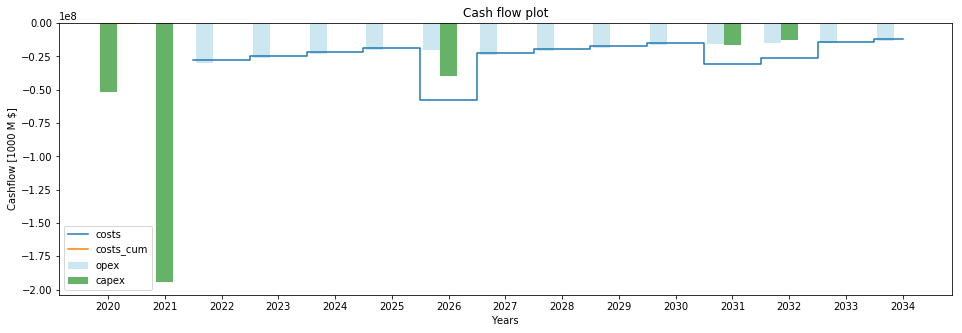

In [13]:
Terminal.cashflow_plot(cash_flows)
Terminal.cashflow_plot(cash_flows_WACC_real)

In [14]:
Terminal.NPV()

PV: [-5.14838604e+07 -1.94182607e+08 -2.99616775e+07 -2.63820019e+07
 -2.32300086e+07 -2.04546001e+07 -5.97685447e+07 -2.39259668e+07
 -2.10674086e+07 -1.85503771e+07 -1.63340682e+07 -3.17670232e+07
 -2.76983220e+07 -1.49974229e+07 -1.32056037e+07]
NPV: -573009492.8992233
